In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pandas_profiling


/var/folders/t9/p_t5rsf92s38bb58_mfpk3rm0000gn/T/ipykernel_24377/3497878895.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/var/folders/t9/p_t5rsf92s38bb58_mfpk3rm0000gn/T/ipykernel_24377/3497878895.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [5]:
orders = pd.read_csv('/Users/vladimiregorov/Downloads/datasets 3/data_orders.csv')
offers = pd.read_csv('/Users/vladimiregorov/Downloads/datasets 3/data_offers.csv')

In [6]:
orders.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [42]:
orders.head(3)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0


In [164]:
order_place = orders[['origin_longitude', 'origin_latitude', 'order_gk', 'cancellations_time_in_seconds']]

In [165]:
order_place.head(3)

,origin_longitude,origin_latitude,order_gk,cancellations_time_in_seconds
0,-0.978916,51.456173,3000583041974,198.0
1,-0.950385,51.456843,3000583116437,128.0
2,-0.969520,51.455544,3000582891479,46.0


In [41]:
offers.head(3)

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812


In [49]:
orders.shape

(10716, 8)

In [43]:
orders.dtypes

order_datetime                    object
origin_longitude                 float64
origin_latitude                  float64
m_order_eta                      float64
order_gk                           int64
order_status_key                   int64
is_driver_assigned_key             int64
cancellations_time_in_seconds    float64
dtype: object

In [46]:
orders.isna().sum()

order_datetime                      0
origin_longitude                    0
origin_latitude                     0
m_order_eta                      7902
order_gk                            0
order_status_key                    0
is_driver_assigned_key              0
cancellations_time_in_seconds    3409
dtype: int64

In [48]:
offers.isna().count()

order_gk    334363
offer_id    334363
dtype: int64

In [50]:
offers.shape

(334363, 2)

In [166]:
number_of_requests = offers.groupby('order_gk').count().reset_index()
number_of_requests.rename(columns={'offer_id' : 'quantity'}, inplace=True)
number_of_requests.head()

,order_gk,quantity
0,3000551431542,1
1,3000551431560,2
2,3000551431566,5
3,3000551431577,2
4,3000551431592,7


In [167]:
number_of_requests.loc[number_of_requests['quantity'] > 1, 'order_gk'].count()

72193

In [168]:
number_of_requests = number_of_requests.merge(order_place, how='inner', left_on='order_gk', right_on='order_gk')
number_of_requests.head(3)

,order_gk,quantity,origin_longitude,origin_latitude,cancellations_time_in_seconds
0,3000551431657,3,-0.946766,51.444113,31.0
1,3000551431687,4,-0.946900,51.444047,1075.0
2,3000551456281,4,-0.946900,51.444047,116.0


In [76]:
number_of_requests.shape

(7610, 8)

In [108]:
number_of_requests['quantity'].value_counts()

quantity
1    1461
3    1202
4     997
2     914
6     755
5     726
7     647
8     476
9     432
Name: count, dtype: int64

In [83]:
number_of_requests.head()

,order_gk,quantity,origin_longitude,origin_latitude
0,3000551431657,3,-0.946766,51.444113
1,3000551431687,4,-0.946900,51.444047
2,3000551456281,4,-0.946900,51.444047
3,3000551456507,4,-0.969568,51.451614
4,3000551970359,1,-1.040539,51.442564


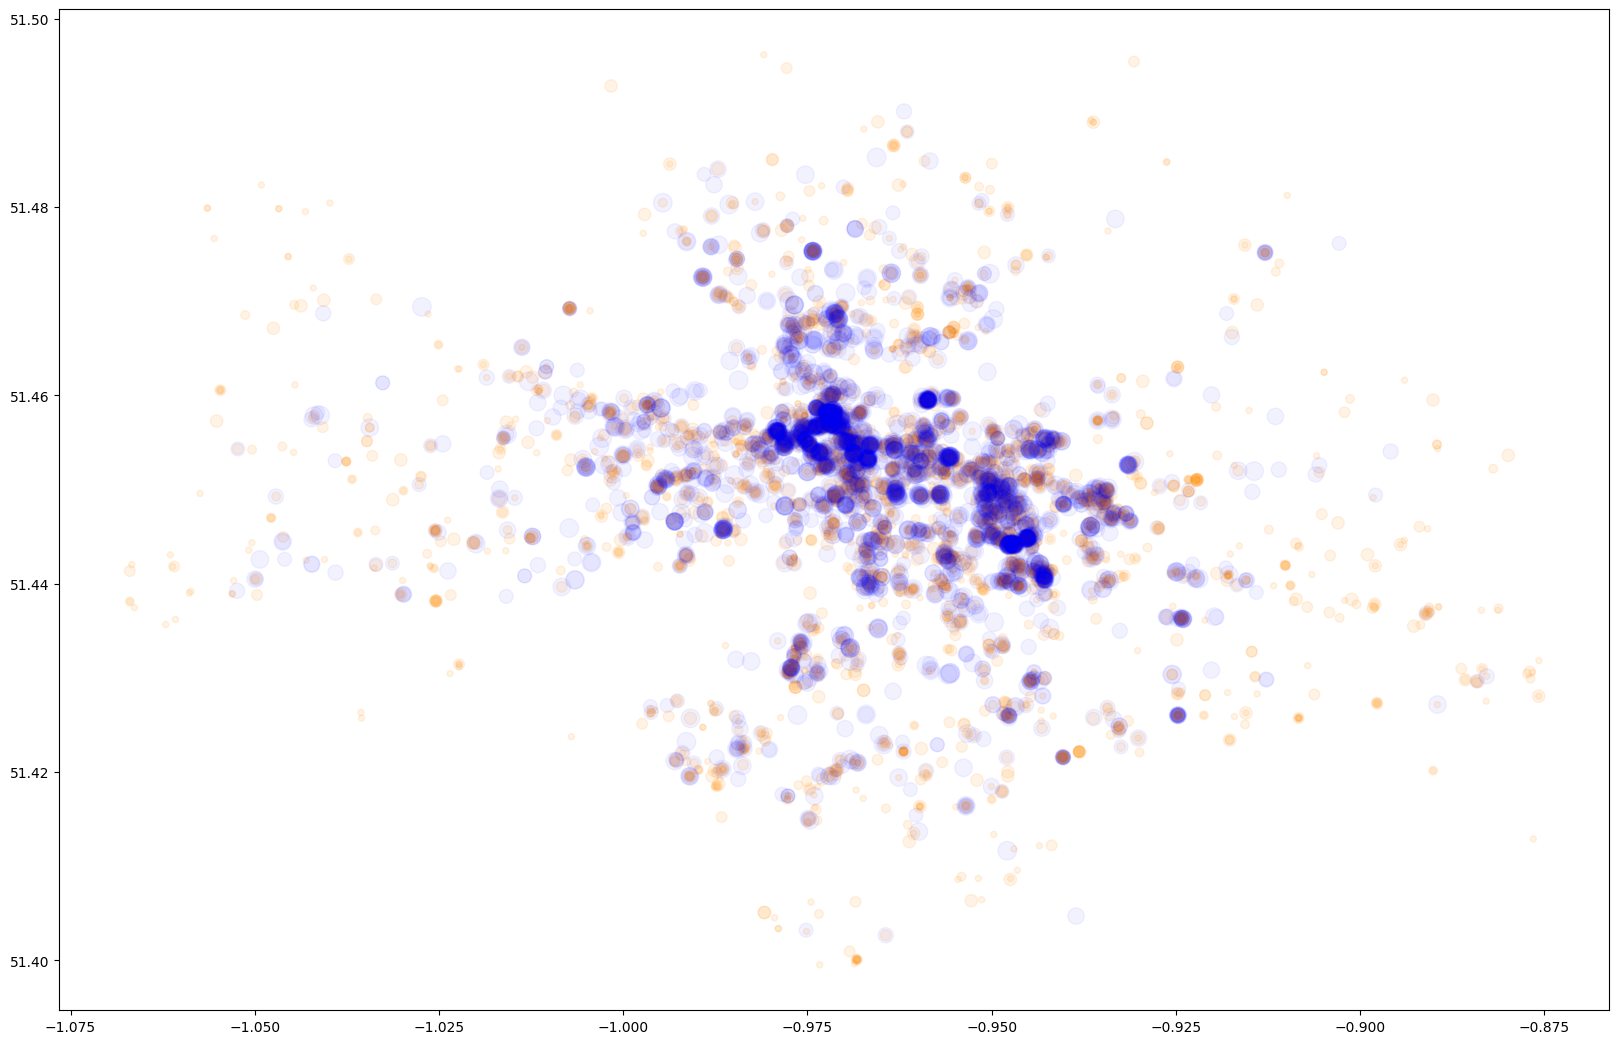

In [163]:
fig = plt.figure(figsize=(20,13))
ax = fig.add_subplot()
x = number_of_requests.loc[number_of_requests['quantity'] < 5, 'origin_longitude']
y = number_of_requests.loc[number_of_requests['quantity'] < 5, 'origin_latitude']
ax.scatter(x, y, s=number_of_requests.loc[number_of_requests['quantity'] < 5, 'quantity']*20, alpha=0.1, color='darkorange')
x1 = number_of_requests.loc[number_of_requests['quantity'] >= 5, 'origin_longitude']
y1 = number_of_requests.loc[number_of_requests['quantity'] >= 5, 'origin_latitude']
ax.scatter(x1,y1, s=number_of_requests.loc[number_of_requests['quantity'] >= 5, 'quantity']*20, alpha=0.05, color='blue')

In [169]:
orders.head(3)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0


In [171]:
orders.dtypes

order_datetime                    object
origin_longitude                 float64
origin_latitude                  float64
m_order_eta                      float64
order_gk                           int64
order_status_key                   int64
is_driver_assigned_key             int64
cancellations_time_in_seconds    float64
dtype: object

In [342]:
orders['order_datetime'] = orders['order_datetime'].apply(lambda x: datetime.strftime(x, '%H:%M:%S'))


In [214]:
orders.dtypes

order_datetime                   datetime64[ns]
origin_longitude                        float64
origin_latitude                         float64
m_order_eta                             float64
order_gk                                  int64
order_status_key                          int64
is_driver_assigned_key                    int64
cancellations_time_in_seconds           float64
dtype: object

In [215]:
orders['hour'] = orders['order_datetime'].apply(lambda x: x.strftime('%H'))


In [238]:
orders['Reject'] = 'Before'

In [240]:
orders.loc[(orders['m_order_eta'] - orders['cancellations_time_in_seconds']) > 0, 'Reject'] = 'After'

In [347]:
orders.loc[orders['cancellations_time_in_seconds'].isna(), 'Reject'] = 'OK'

In [241]:
(orders['Reject'] == 'After').sum()

2053

<Axes: >

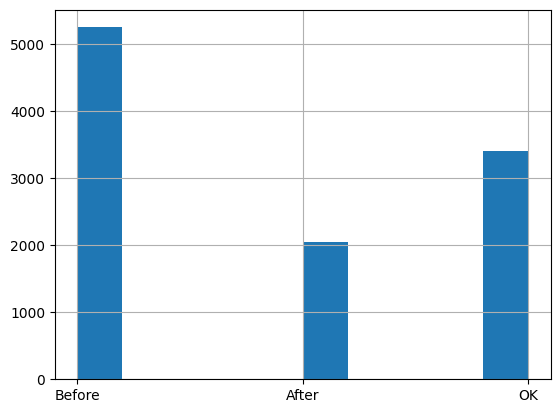

In [348]:
orders['Reject'].hist()

In [343]:
orders.head(3)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,hour,Reject
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,18,Before
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,20,Before
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,12,After


In [349]:
data = orders.query('cancellations_time_in_seconds > 0 & Reject == "Before"').groupby('hour').agg({'order_gk' : 'count', 'cancellations_time_in_seconds' : 'mean'}).reset_index()


In [350]:
data.columns = ['hour', 'quantity', 'cancellations_time']

In [351]:
data.head()

,hour,quantity,cancellations_time
0,00,349,170.942693
1,01,247,150.684211
2,02,266,153.439850
3,03,245,151.216327
4,04,68,180.161765


<BarContainer object of 24 artists>

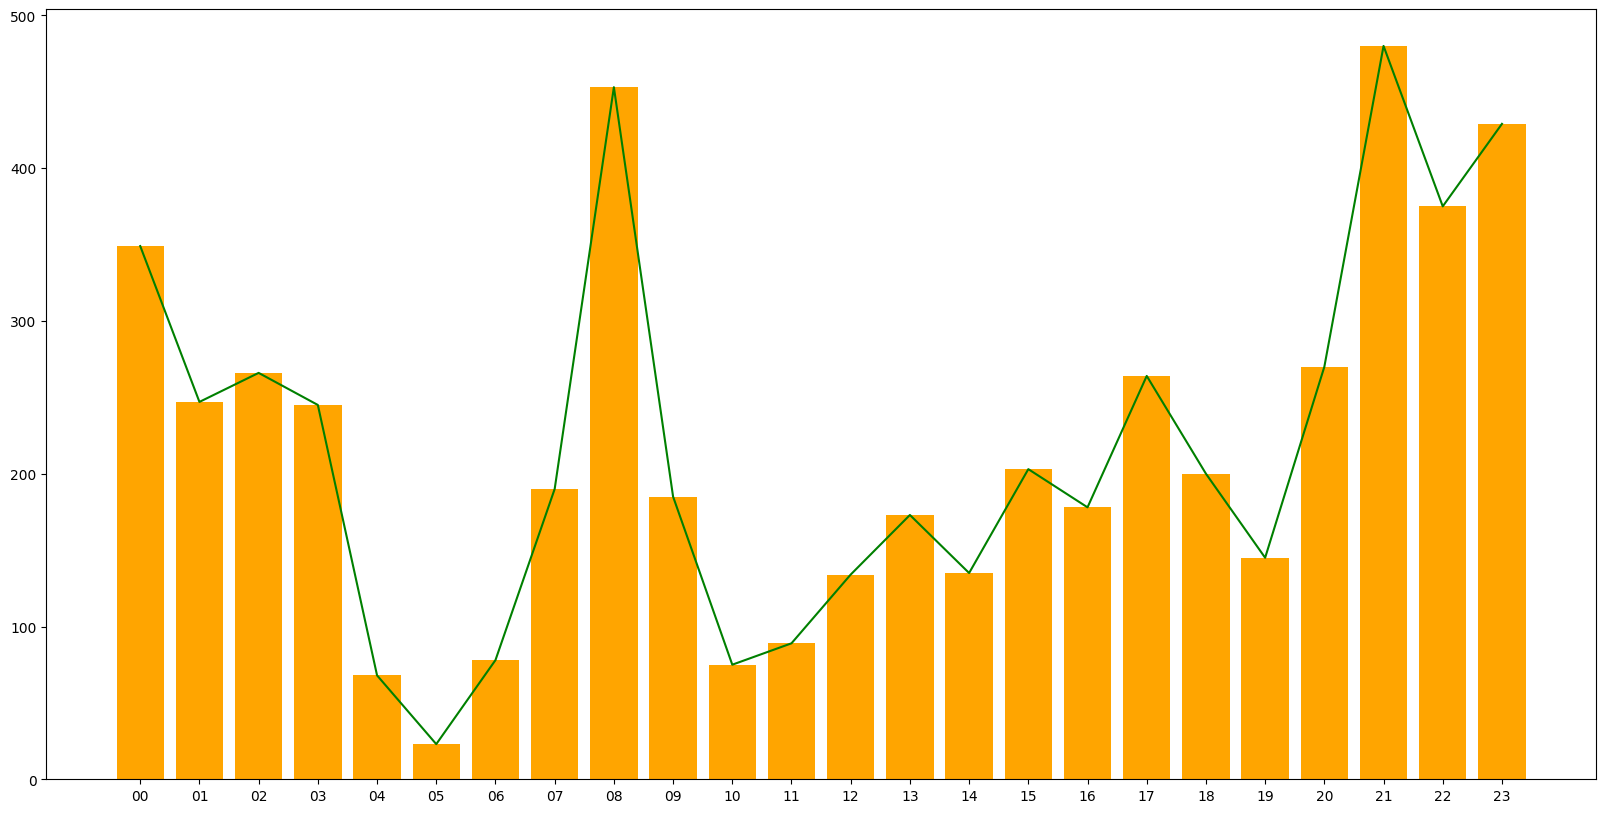

In [352]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
x = data['hour']
y = data['quantity']
ax.plot(x,y, color='green')
ax.bar(x,y, color='orange')

<BarContainer object of 24 artists>

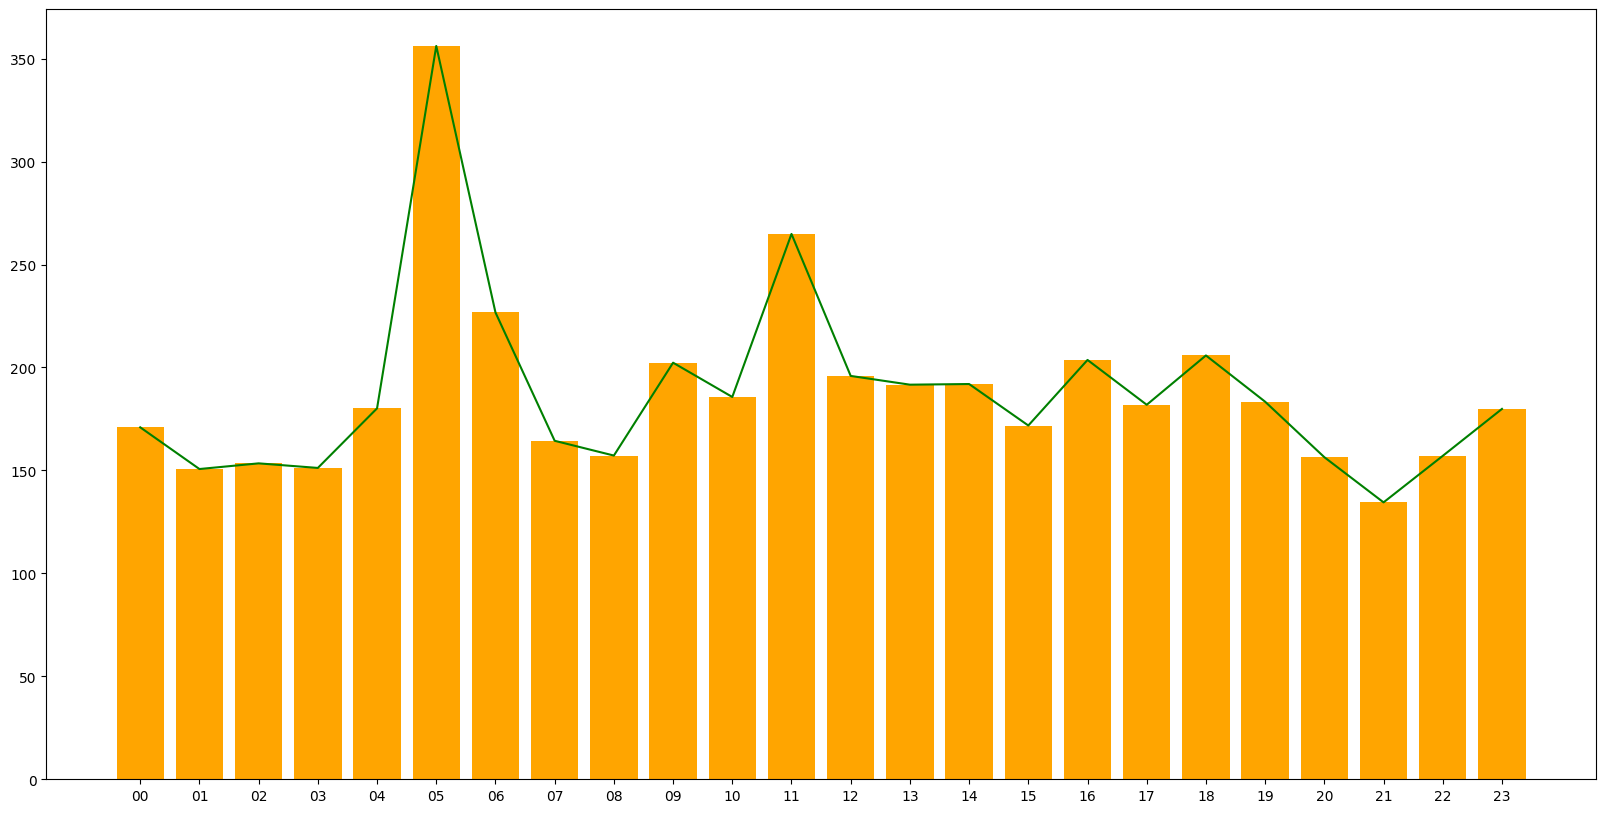

In [353]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
x = data['hour']
y = data['cancellations_time']
ax.plot(x,y, color='green')
ax.bar(x,y, color='orange')

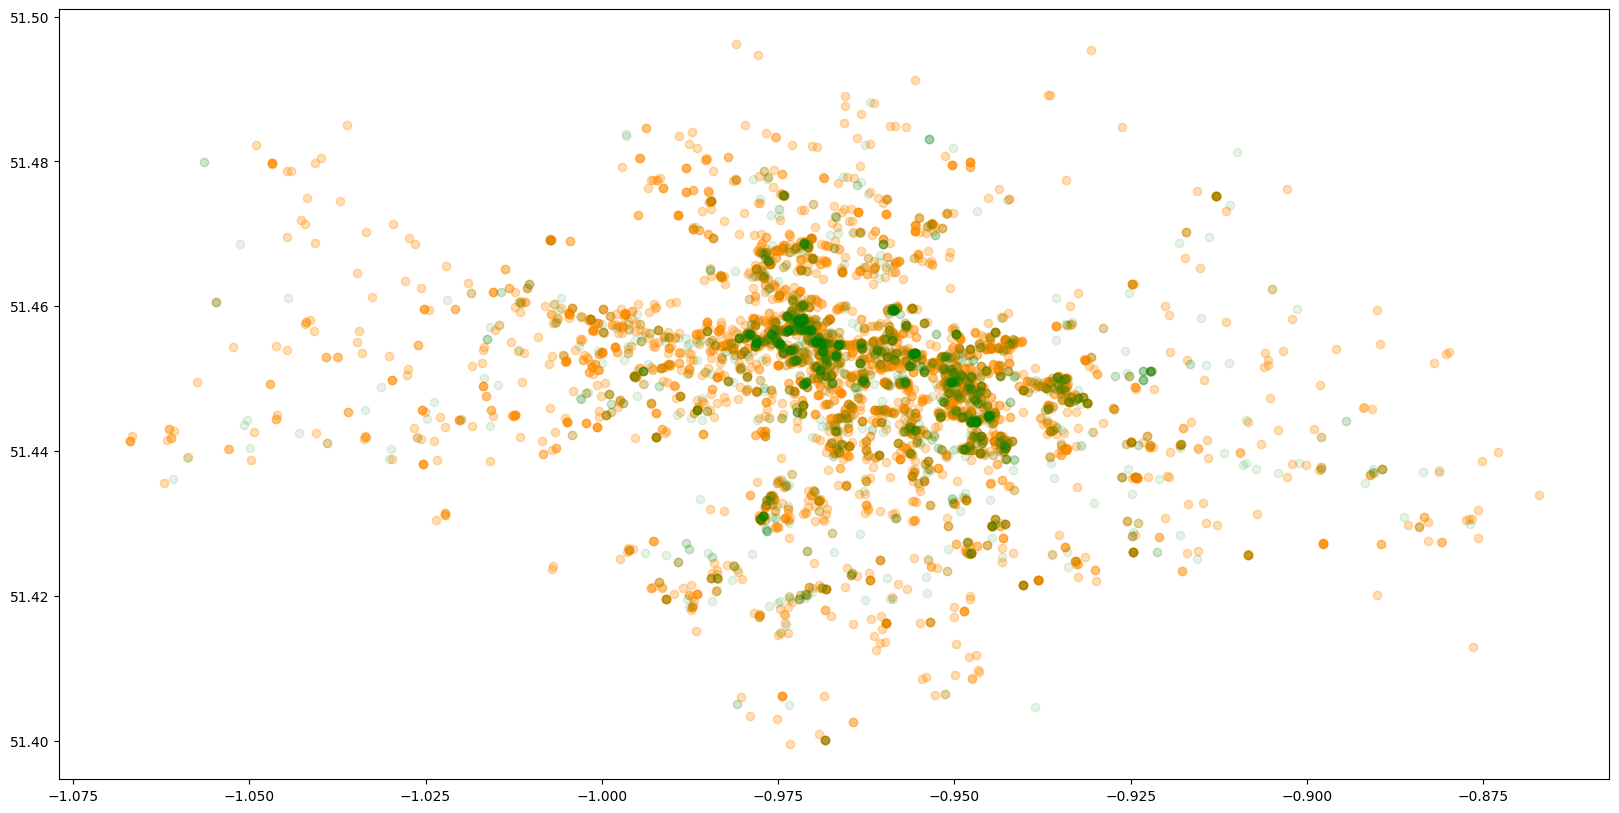

In [405]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
x = orders.loc[orders['Reject']=='Before', 'origin_longitude']
y = orders.loc[orders['Reject']=='Before', 'origin_latitude']
ax.scatter(x,y, color='darkorange', alpha = 0.3)
x1 = orders.loc[orders['Reject']=='After', 'origin_longitude']
y1 = orders.loc[orders['Reject']=='After', 'origin_latitude']
ax.scatter(x1,y1, color='green', alpha = 0.1)

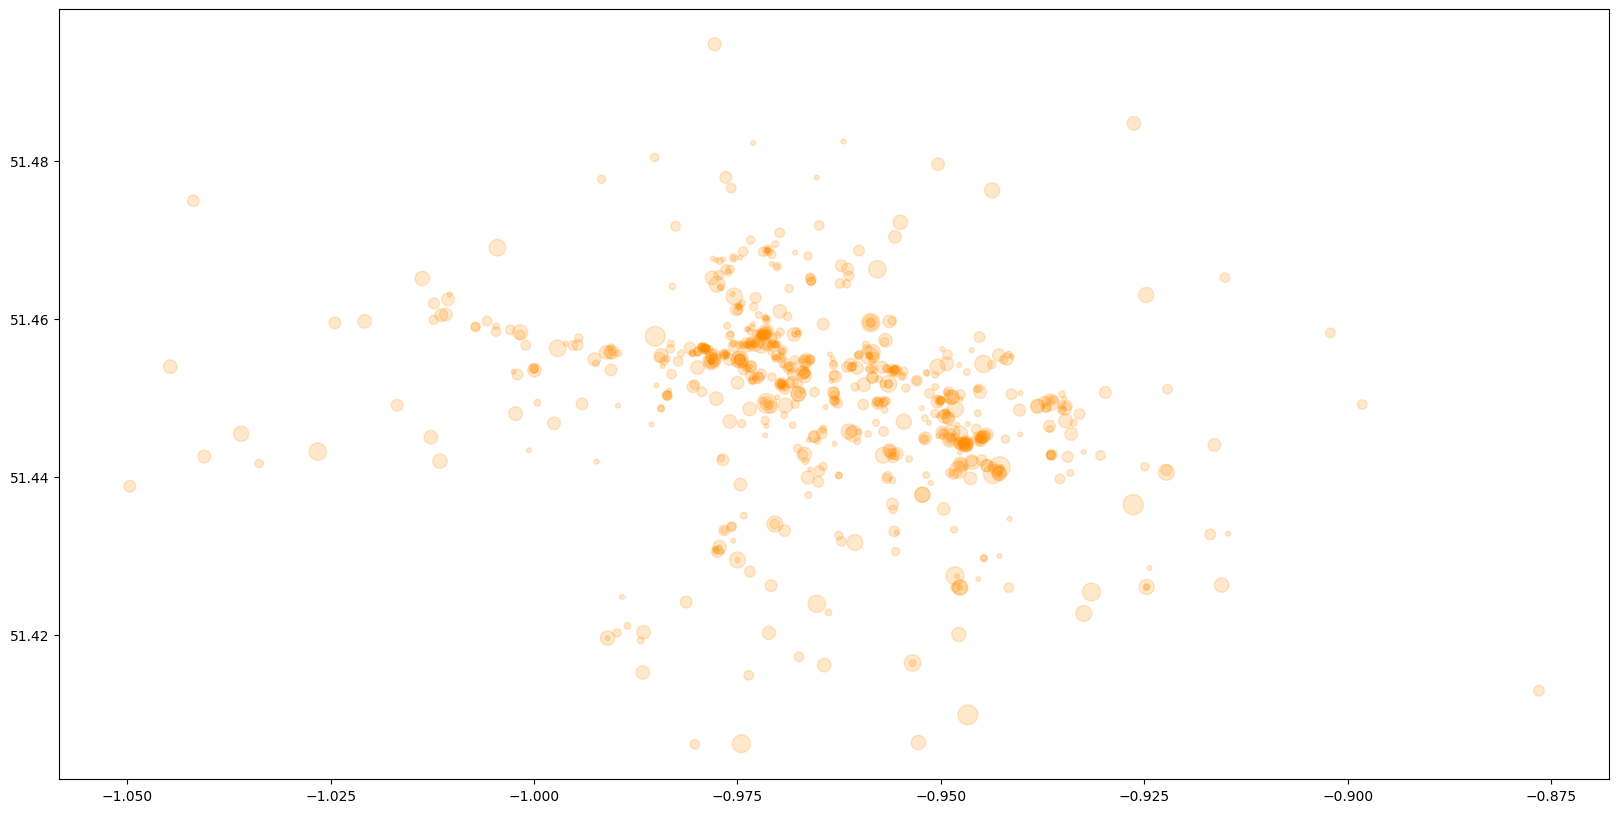

In [419]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
x = orders.loc[orders['Reject']=='Before', 'origin_longitude']
y = orders.loc[orders['Reject']=='Before', 'origin_latitude']
ax.scatter(x,y, color='darkorange', s=orders.loc[orders['Reject']=='Before', 'm_order_eta']*0.2,alpha = 0.2)